In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import seaborn as sns
import time

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE

In [3]:
!python -m spacy download en_core_web_lg 

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [4]:
import re
nlp = spacy.load("en_core_web_lg")
import gensim.downloader as api
wv = api.load('glove-twitter-200')

In [5]:
amazon = pd.read_csv('train.csv')

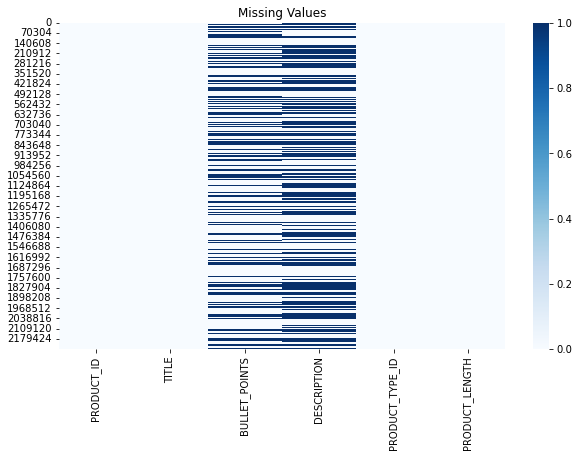

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(amazon.isnull(), cmap = 'Blues')

plt.title('Missing Values')
plt.show()

amazon_df = amazon.copy()

amazon_df = amazon_df.sample(100)

amazon_df = amazon_df.dropna()

amazon_df.reset_index(drop= True, inplace = True)

amazon_df = amazon_df.drop(columns = ['PRODUCT_ID','PRODUCT_TYPE_ID'])

In [7]:
def preprocessing(text):
    
    text = text.lower()
    text = re.sub(r'<[^>]*>', '', text)
    text = re.sub(r'[^\w+.]',' ', text)
    text = text.strip()
    text = re.sub(r'\s{2,}', ' ', text)
    
    doc = nlp(text)
    filtered_token = []
    
    for token in doc:
        if token.is_punct or token.is_stop:
          continue
        filtered_token.append(token.lemma_)
    
    return(wv.vectors_for_all(filtered_token))

In [11]:
for i in range(0, len(amazon), 10000):
    start_time = time.time()
    amazon_df = amazon.copy()
    amazon_df = amazon_df[i:i+10000]
    amazon_df = amazon_df.dropna()
    amazon_df.reset_index(drop= True, inplace = True)
    amazon_df = amazon_df.drop(columns = ['PRODUCT_ID','PRODUCT_TYPE_ID'])
    for j in range(3):
        amazon_df.iloc[:,j] = amazon_df.iloc[:,j].apply(lambda x: preprocessing(x))
    amazon_df_len = amazon_df.copy()
    for k in range(3):
        amazon_df_len.iloc[:,k] = amazon_df.iloc[:,k].apply(lambda x: len(x))
    amazon_df = amazon_df[amazon_df_len != 0].dropna()
    for l in range(3):
        amazon_df.iloc[:,l] = amazon_df.iloc[:,l].apply(lambda x: x[0])
    file_name = 'amazon_df_csvs' + '/' + 'amazon_df' + str(i) + '.csv'
    amazon_df.to_csv(file_name)
    end_time = time.time()
    execution_time = end_time - start_time
    print(f"Execution time for {i} to {i+10000}: {execution_time} seconds")

Execution time for 0 to 10000: 606.1746759414673 seconds
Execution time for 10000 to 20000: 283.8364055156708 seconds
Execution time for 20000 to 30000: 274.66912865638733 seconds
Execution time for 30000 to 40000: 274.6955578327179 seconds
Execution time for 40000 to 50000: 287.3083038330078 seconds
Execution time for 50000 to 60000: 283.3090522289276 seconds
Execution time for 60000 to 70000: 283.554048538208 seconds
Execution time for 70000 to 80000: 284.33242106437683 seconds
Execution time for 80000 to 90000: 278.2636909484863 seconds
Execution time for 90000 to 100000: 275.46163606643677 seconds
Execution time for 100000 to 110000: 51047.51326727867 seconds
Execution time for 110000 to 120000: 388.5432198047638 seconds
Execution time for 120000 to 130000: 342.04045510292053 seconds
Execution time for 130000 to 140000: 337.17444109916687 seconds
Execution time for 140000 to 150000: 324.68990564346313 seconds
Execution time for 150000 to 160000: 306.2640292644501 seconds
Execution 

import time

start_time = time.time()

for i in range(3):
    amazon_df.iloc[:, i] = amazon_df.iloc[:, i].apply(lambda x: preprocessing(x))

end_time = time.time()
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")

In [118]:
amazon_df_len = amazon_df.copy()
for i in range(3):
    amazon_df_len.iloc[:,i] = amazon_df.iloc[:,i].apply(lambda x: len(x))

In [119]:
amazon_df = amazon_df[amazon_df_len != 0].dropna()

In [120]:
for i in range(3):
    amazon_df.iloc[:,i] = amazon_df.iloc[:,i].apply(lambda x: x[0])

In [1]:
amazon_df.head()

NameError: name 'amazon_df' is not defined

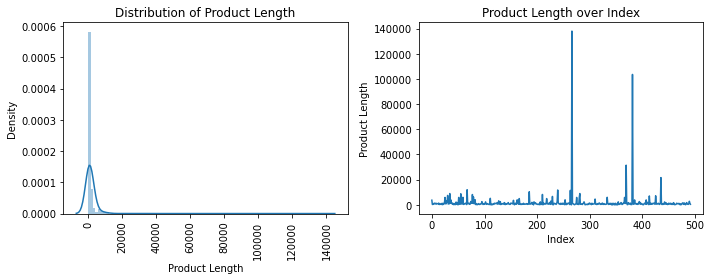

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot the distribution plot in the first subplot
plt.subplot(1, 2, 1)
sns.distplot(amazon_df['PRODUCT_LENGTH'], bins=100)
plt.xlabel('Product Length')
plt.ylabel('Density')
plt.title('Distribution of Product Length')
plt.xticks(rotation = 90)

# Plot the line plot in the second subplot
plt.subplot(1, 2, 2)
plt.plot(amazon_df['PRODUCT_LENGTH'])
plt.xlabel('Index')
plt.ylabel('Product Length')
plt.title('Product Length over Index')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [56]:
X = amazon_df.drop(columns = ['PRODUCT_LENGTH'])
Y = amazon_df.PRODUCT_LENGTH

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 2)

In [58]:
reg = Pipeline([
    
    ('Linear Reg' , LinearRegression())
    
])

In [59]:
reg.fit(np.stack(X_train.values.flatten()).reshape(len(X_train),-1), Y_train.values)

Pipeline(steps=[('Linear Reg', LinearRegression())])

In [60]:
Y_pred = reg.predict(np.stack(X_test.values.flatten()).reshape(len(X_test), -1))

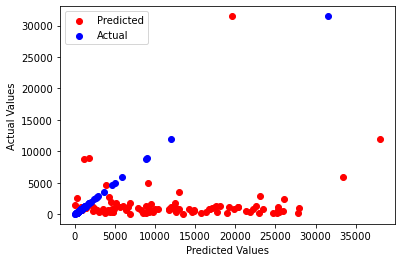

In [61]:
import matplotlib.pyplot as plt

# Plotting the predicted values
plt.scatter(abs(Y_pred), Y_test, c='red', label='Predicted')

# Plotting the actual values
plt.scatter(Y_test, Y_test, c='blue', label='Actual')

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error


mape = mean_absolute_percentage_error(Y_test,abs(Y_pred))
mse = mean_squared_error(Y_test,abs(Y_pred))

mape, mse

(25.563709133193665, 188231619.69992805)